# Average Monthly Temperatures, 1970-2004

**Date:** 2021-12-02

**Reference:**

In [14]:
library(TTR)

In [1]:
options(
    jupyter.plot_mimetypes = "image/svg+xml",
    repr.plot.width = 7,
    repr.plot.height = 5
)

## Summary

The aim of this notebook was to show how to decompose seasonal time series data using **R** so the trend, seasonal and irregular components can be estimated.
Data on the average monthly temperatures in central England from January 1970 to December 2004 was plotted.
The series was decomposed using the `decompose` function from `R.stats` and the seasonal factors displayed as a `matrix`.
A seasonally adjusted series was calculated by subtracting the seasonal factors from the original series.
The seasonally adjusted series was used to plot an estimate of the trend component by taking a simple moving average.
The irregular component was estimated by subtracting the estimate of the trend and seasonal components from the original time series.

## Get the data

Data on the average monthly temperatures in central England January 1970 to December 2004 is shown below.

In [2]:
monthlytemps <- read.csv("..\\..\\data\\moderntemps.csv")
head(monthlytemps)

,temperature,date
,<dbl>,<chr>
1,3.7,Jan-70
2,2.9,Feb-70
3,3.7,Mar-70
4,6.7,Apr-70
5,13.0,May-70
6,16.4,Jun-70


In [3]:
modtemps <- monthlytemps$temperature

## Plot the time series

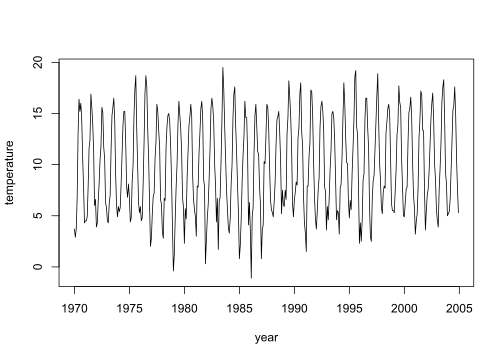

In [6]:
ts_modtemps <- ts(modtemps, start = c(1970, 1), frequency = 12)
plot.ts(ts_modtemps, xlab = "year", ylab = "temperature")

The time series is highly seasonal with little evidence of a trend.
There appears to be a constant level of approximately 10$^{\circ}$C.

## Decompose the data

Use the `decompose` function from `R.stats` to return estimates of the trend, seasonal, and irregular components of the time series.

In [7]:
decomp_ts <- decompose(ts_modtemps)

## Seasonal factors

Calculate the seasonal factors of the decomposed time series.
Cast the `seasonal` time series object held in `decomp_ts` to a `vector`, slice the new vector to isolate a single period, and then cast the sliced vector to a named `matrix`.

In [8]:
sf <- as.vector(decomp_ts$seasonal)
(matrix(sf[1:12], dimnames = list(month.abb, c("factors"))))

,factors
Jan,-5.5638889
Feb,-5.4665850
Mar,-3.4897467
Apr,-1.6342320
May,1.5986111
Jun,4.3623366
Jul,6.6891748
Aug,6.5107435
Sep,3.9541258
Oct,0.6472631


_Add a comment_

## Plot the components

Plot the trend, seasonal, and irregular components in a single graphic.

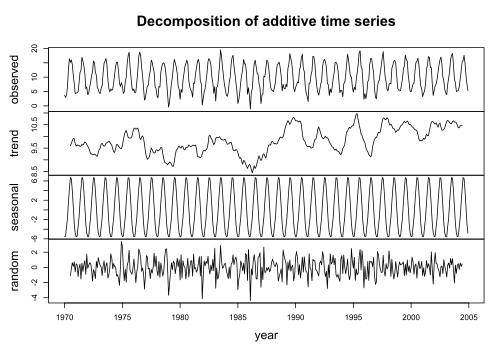

In [9]:
plot(decomp_ts, xlab = "year")

Plot the individual components of the decomposition by accessing the variables held in the `tsdecomp`.
This will generally make the components easier to understand.

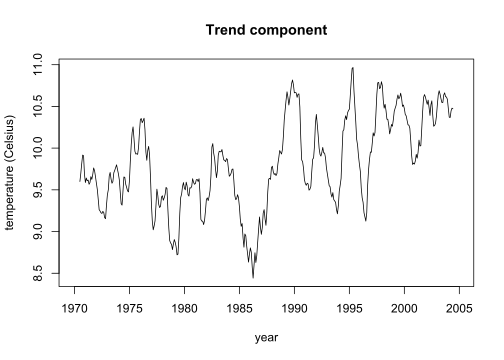

In [10]:
plot(decomp_ts$trend, xlab = "year", ylab = "temperature (Celsius)")
title(main = "Trend component")

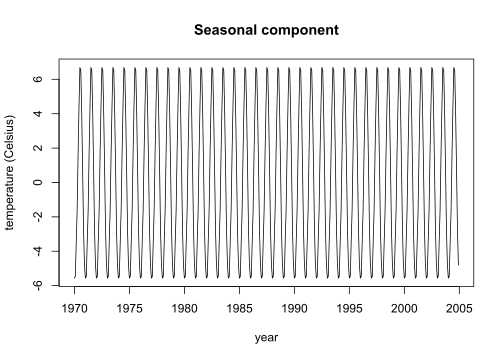

In [11]:
plot(decomp_ts$seasonal, xlab = "year", ylab = "temperature (Celsius)")
title(main = "Seasonal component")

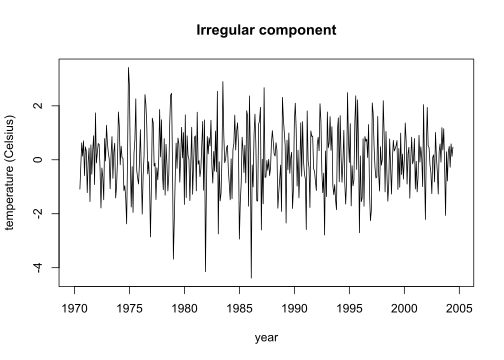

In [12]:
plot(decomp_ts$random, xlab = "year", ylab = "temperature (Celsius)")
title(main = "Irregular component")

_Add comment on trend, seasonal, and irregular components._

_Which component dominates the series?_

## Seasonal adjusted plot

Plot the seasonally adjusted series by subtracting the seasonal factors from the original series.

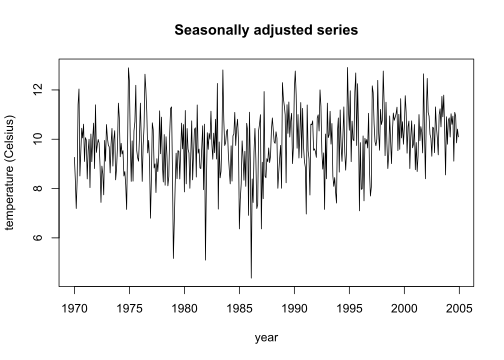

In [13]:
adjusted_ts <- ts_modtemps - decomp_ts$seasonal
plot(adjusted_ts, xlab = "year", ylab = "temperature (Celsius)")
title(main = "Seasonally adjusted series")

This new seasonally adjusted series only contains the trend and irregular components, so it can be treated as if it is non-seasonal data.
Estimate the trend component by taking the simple moving order of order 35.

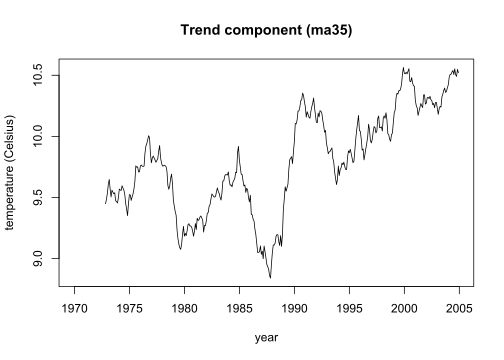

In [15]:
sma35_adjusted_ts <- SMA(adjusted_ts, n = 35)
plot.ts(sma35_adjusted_ts, xlab = "year", ylab = "temperature (Celsius)")
title(main = "Trend component (ma35)")

Note that this is a different estimate of the trend component to what is contained in `decomp_ts`, as it uses a different order for the simple moving average.